In [1]:
import torchaudio

import IPython
import matplotlib.pyplot as plt

In [2]:
audio, _ = torchaudio.load('/home/shangeth/Downloads/Dataset/TIMIT/Wav_Data/TRAIN/FAEM0_SA2.WAV')
print(audio.shape)

torch.Size([1, 45261])


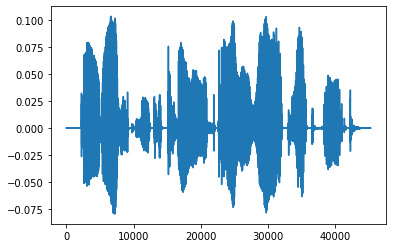

In [3]:
plt.plot(audio.reshape(-1))
plt.show()

IPython.display.Audio(audio.reshape(-1), rate=16000)

# Additive noise

In [28]:
from wavencoder.transforms import AdditiveNoise

add = AdditiveNoise('/home/shangeth/Downloads/Dataset/DLIVING_16k/DLIVING', p=0.9, snr_levels=[5, 10, 15])

noisy = add(audio)
print(noisy.shape)

torch.Size([1, 45261])


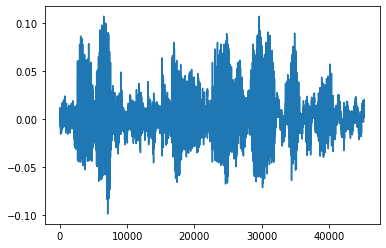

In [29]:
plt.plot(noisy.reshape(-1))
plt.show()

IPython.display.Audio(noisy.reshape(-1), rate=16000)

# Additive White Gausian Noise(AWGNoise)

In [14]:
from wavencoder.transforms import AWGNoise

add = AWGNoise(p=0.9, snr_range=(15, 30))

noisy = add(audio)
print(noisy.shape)

torch.Size([1, 45261])


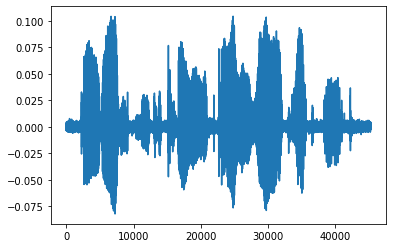

In [15]:
plt.plot(noisy.reshape(-1))
plt.show()

IPython.display.Audio(noisy.reshape(-1), rate=16000)

# Speed

In [30]:
from wavencoder.transforms import SpeedChange

speed = SpeedChange(factor_range=(-0.9, 0.0))
speedy = speed(audio)

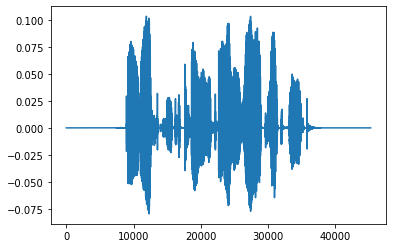

In [31]:
plt.plot(speedy.reshape(-1))
plt.show()

IPython.display.Audio(speedy.reshape(-1), rate=16000)

# Clipping

In [32]:
from wavencoder.transforms import Clipping

clip = Clipping()
clipped = clip(audio)

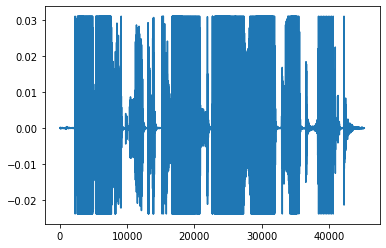

In [33]:
plt.plot(clipped.reshape(-1))
plt.show()

IPython.display.Audio(clipped.reshape(-1), rate=16000)

# Pad-Crop

In [52]:
from wavencoder.transforms import Pad, Crop, PadCrop

pad_crop = PadCrop(16000, crop_position='random')
pad_cropped = pad_crop(audio)

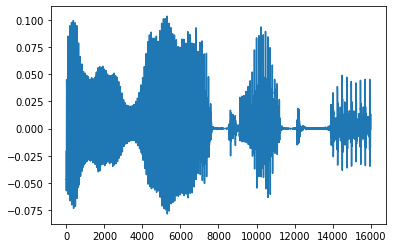

In [53]:

plt.plot(pad_cropped.reshape(-1))
plt.show()

IPython.display.Audio(pad_cropped.reshape(-1), rate=16000)

# Reverbaration

In [8]:
from wavencoder.transforms import Reverberation

reverb = Reverberation('/home/shangeth/Downloads/pySpeechRev/IR_examples/', 3000, mat_dict_key='risp_imp')
reverbed = reverb(audio)

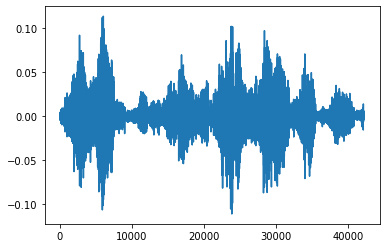

In [9]:
plt.plot(reverbed.reshape(-1))
plt.show()

IPython.display.Audio(reverbed.reshape(-1), rate=16000)

# Compose

In [11]:
from wavencoder.transforms import Compose, AdditiveNoise, SpeedChange, Clipping, PadCrop, Reverberation

audio, _ = torchaudio.load('/home/shangeth/Downloads/Dataset/TIMIT/Wav_Data/TRAIN/FAEM0_SA2.WAV')

transforms = Compose([AdditiveNoise('/home/shangeth/Downloads/Dataset/DLIVING_16k/DLIVING'),
                     SpeedChange(factor_range=(-0.5, 0.0)),
                     Clipping(),
                     PadCrop(48000), 
                     Reverberation('/home/shangeth/Downloads/pySpeechRev/IR_examples/', 3000, mat_dict_key='risp_imp')])

transformed_audio = transforms(audio)

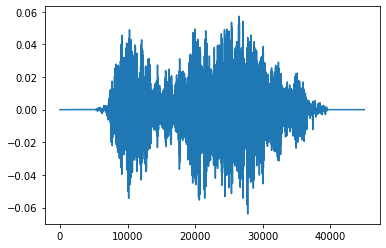

In [12]:
import IPython
import matplotlib.pyplot as plt

plt.plot(transformed_audio.reshape(-1))
plt.show()

IPython.display.Audio(transformed_audio.reshape(-1), rate=16000)